In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import *

To evaluate the robustness of our model, we add AWGN noise with an amplitude of 0.1 to our data. A good model should be insensitive to this noise. Consider the function. *f* :  $[0,1)$ x $[0,1)-> [1,3]$ .

$f(x, y) = sin(2πx) cos(4π y) + 2$. We also analyze convergence behaviour of this metamodel techniques.

In [2]:
# Analytical function to be predicted
def F(X):
    return np.sin(2*np.pi*X[:,0])*np.cos(4*np.pi*X[:,1])+2

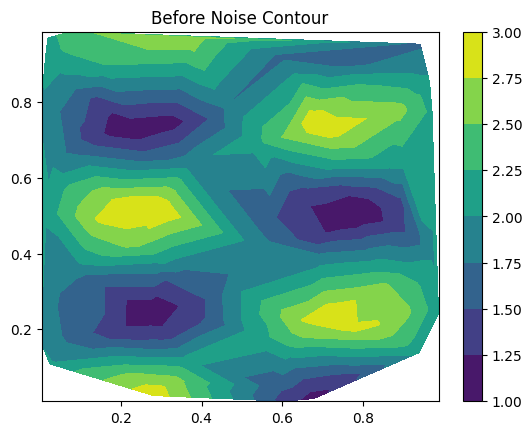

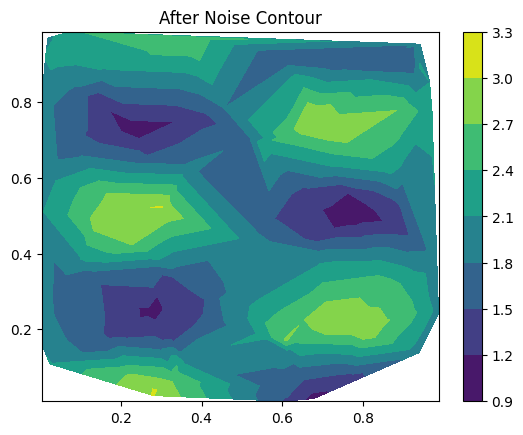

In [3]:
X,y = GenerateData((128,2),F,NoiseAmplitude=0)
VisualizeData2D(X,y,"Before Noise Contour")

XNoise,yNoise = GenerateData((128,2),F,NoiseAmplitude=0.1)
VisualizeData2D(XNoise,yNoise,"After Noise Contour")

In [4]:
X_test,y_test = GenerateData((1000,2),F)

In [5]:
betas = [40,41,42,43,44]
nCentres = [50,55,60,65]
min_loss,optimal_beta,optimal_nCentres = GridSearch(betas,nCentres,XNoise,yNoise,X_test,y_test)
print(f"minimum loss: {min_loss:.6f}")
print(f"optimal beta: {optimal_beta}")
print(f"optimal number of Centres: {optimal_nCentres}")

minimum loss: 0.097021
optimal beta: 42
optimal number of Centres: 55


In [6]:
model = RBFNN(nCentres=optimal_nCentres)
model.reset_parameter(XNoise,yNoise,beta=optimal_beta)
pred = model.forward(XNoise)
print(f"RBF Centres shape:\n {model.RBF.centres.shape}")
print(f"Weight parameter shape: \n {model.Linear.weights.shape}")

RBF Centres shape:
 (55, 2)
Weight parameter shape: 
 (55,)


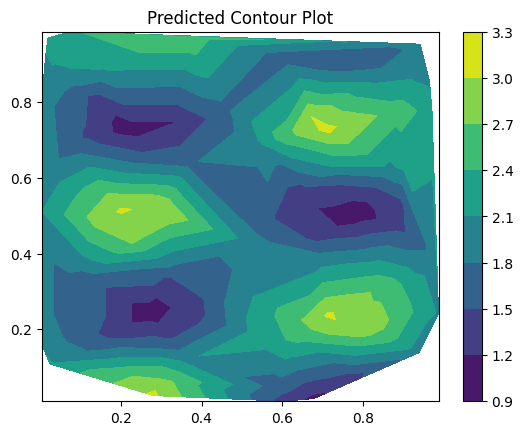

In [7]:
VisualizeData2D(XNoise,pred,"Predicted Contour Plot")

In [8]:
print(f"loss on train data: {MSELoss(pred,y):.5f}")
print(f"loss on test data: {min_loss:.5f}")

loss on train data: 0.06803
loss on test data: 0.09702


In [9]:
train_size = [32,64,128,256]
betas = [28,30,32,34,36,38]
nCentres = [8,16,24,32,40,48,56,64]
test_loss = []
for sz in train_size:
    X,y = GenerateData((sz,2),F,0)
    XNoise,yNoise = GenerateData((sz,2),F,0.1)
    (min_loss,optimal_beta,optimal_nCentres) = GridSearch(betas,nCentres,XNoise,yNoise,X_test,y_test)
    model = RBFNN(nCentres=optimal_nCentres)
    model.reset_parameter(XNoise,yNoise,beta=optimal_beta)
    pred = model.forward(XNoise)
    test_loss.append(min_loss)
    print(f"train size: {sz}")
    print(f"optimal beta: {optimal_beta}, optimal number of centre: {optimal_nCentres}")
    print(f"loss on train data: {MSELoss(pred,y):.5f}")
    print(f"loss on test data: {min_loss:.5f}")
    print("-----------------------------------------------")
    
    

train size: 32
optimal beta: 28, optimal number of centre: 24
loss on train data: 0.10331
loss on test data: 0.34976
-----------------------------------------------
train size: 64
optimal beta: 36, optimal number of centre: 40
loss on train data: 0.08538
loss on test data: 0.16447
-----------------------------------------------
train size: 128
optimal beta: 38, optimal number of centre: 56
loss on train data: 0.06763
loss on test data: 0.09894
-----------------------------------------------
train size: 256
optimal beta: 30, optimal number of centre: 56
loss on train data: 0.06086
loss on test data: 0.06880
-----------------------------------------------


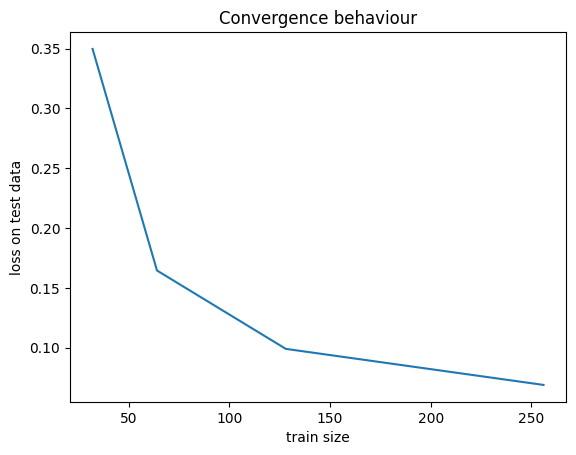

In [10]:
plt.plot(train_size,test_loss)
plt.title("Convergence behaviour")
plt.xlabel("train size")
plt.ylabel("loss on test data")
plt.show()